In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

# Looked at first rows of each table, only measurement has a date column
last_row = session.query(measurement).order_by(measurement.date.desc()).first()
last_date = last_row.date
print(last_date)

2017-08-23


2016-08-23 00:00:00


<AxesSubplot:xlabel='date'>

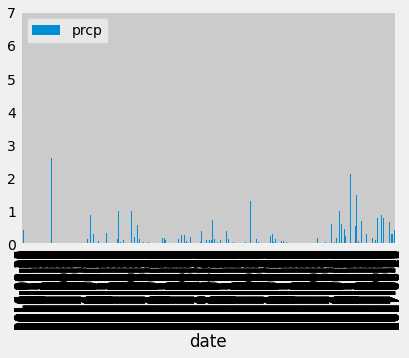

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
first_date = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
print(first_date)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(measurement.date,measurement.prcp).filter(measurement.date > first_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data)

# Sort the dataframe by date
cleaned_prcp_df = prcp_df.dropna()
cleaned_prcp_df.sort_values('date',axis=0)

# Use Pandas Plotting with Matplotlib to plot the data
cleaned_prcp_df.plot(x='date',y='prcp',kind='bar')



In [11]:
cleaned_prcp_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2216,2017-08-17,0.13
2218,2017-08-19,0.09
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [12]:
precip_dict = dict.fromkeys(cleaned_prcp_df['date'],cleaned_prcp_df['prcp'])
precip_dict

{'2016-08-24': 0       0.08
 1       0.08
 2       0.00
 3       0.00
 4       0.01
         ... 
 2216    0.13
 2218    0.09
 2220    0.56
 2221    0.50
 2222    0.45
 Name: prcp, Length: 2015, dtype: float64,
 '2016-08-25': 0       0.08
 1       0.08
 2       0.00
 3       0.00
 4       0.01
         ... 
 2216    0.13
 2218    0.09
 2220    0.56
 2221    0.50
 2222    0.45
 Name: prcp, Length: 2015, dtype: float64,
 '2016-08-26': 0       0.08
 1       0.08
 2       0.00
 3       0.00
 4       0.01
         ... 
 2216    0.13
 2218    0.09
 2220    0.56
 2221    0.50
 2222    0.45
 Name: prcp, Length: 2015, dtype: float64,
 '2016-08-27': 0       0.08
 1       0.08
 2       0.00
 3       0.00
 4       0.01
         ... 
 2216    0.13
 2218    0.09
 2220    0.56
 2221    0.50
 2222    0.45
 Name: prcp, Length: 2015, dtype: float64,
 '2016-08-28': 0       0.08
 1       0.08
 2       0.00
 3       0.00
 4       0.01
         ... 
 2216    0.13
 2218    0.09
 2220    0.56
 2221    0.50
 2

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(cleaned_prcp_df.describe())

# mean = prcp_df['prcp'].mean()
# median = prcp_df['prcp'].median()
# min = prcp_df['prcp'].min()
# max = prcp_df['prcp'].max()
# stdev = prcp_df['prcp'].std()


              prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [14]:
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b72e519ac8>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'longitude': -157.8168,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US'}

In [15]:
first_row = session.query(measurement).order_by(measurement.date.desc()).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b729831448>,
 'station': 'USC00519397',
 'tobs': 81.0,
 'id': 2724,
 'date': '2017-08-23',
 'prcp': 0.0}

In [16]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station.id).count()
station_count

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station)\
                    .order_by(func.count(measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(f'Lowest temp is {min_temp}')
print(f'Highest temp is {max_temp}')
print(f'Average temp is {avg_temp}')

Lowest temp is [(54.0,)]
Highest temp is [(85.0,)]
Average temp is [(71.66378066378067,)]


In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(measurement.tobs,func.count(measurement.tobs)).\
            group_by(measurement.tobs).filter(measurement.station == 'USC00519281').\
            filter(measurement.date > first_date).all()
tobs_data

[(59.0, 3),
 (60.0, 2),
 (61.0, 1),
 (62.0, 6),
 (63.0, 4),
 (64.0, 3),
 (65.0, 7),
 (66.0, 5),
 (67.0, 15),
 (68.0, 12),
 (69.0, 19),
 (70.0, 22),
 (71.0, 18),
 (72.0, 22),
 (73.0, 18),
 (74.0, 39),
 (75.0, 33),
 (76.0, 33),
 (77.0, 30),
 (78.0, 22),
 (79.0, 18),
 (80.0, 11),
 (81.0, 4),
 (82.0, 3),
 (83.0, 1)]

(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 52., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <BarContainer object of 12 artists>)

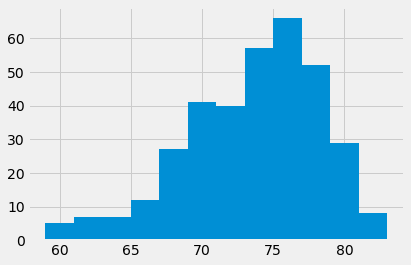

In [20]:
tobs_df = pd.DataFrame(tobs_data, columns=['temperature','frequency'])
plt.hist(x=tobs_df['temperature'],weights=tobs_df['frequency'],bins=12)

# Close session

In [21]:
# Close Session
session.close()